# Sprawozdanie Eksploracja Danych
## Laboratorium 2 - 20.11.2024

Zbadanie funkcji estymującej jądra na danych generowanych losowo oraz przedstawienie wyników w formie graficznej.

Szymon Moździerz\
Krzysztof Żelazny\
Adrian Sławiński

### Cele sprawozdania:
1. Sprawdzenie wpływu ilości wyygenerowanych próbek na ich graficzne przedstawienie na wykresie.
2. Zbadaie wpływu ilości przedziałów wykorzystanych do przedstawienia danych na histogramie danego rozkładu, na zgodność wykresu z teorią.
3. Zbadanie wpływu różnych parametrów na wartości funkcji estymatora jądra.


## Wykorzystane biblioteki

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Ziarno

Dla zapewnienia powtarzalności otrzymywanych wyników, wprowadzone zostało stałę ziarno. 

In [ ]:
np.random.seed(4)

In [ ]:
# sample_size = 10
# uniform_sample = np.random.uniform(2, 7, sample_size)
# y = [0 for _ in range(sample_size)]

In [ ]:
# plt.scatter(uniform_sample, y, marker='|', s=500, c='r')
# plt.title('Wykres rozkładu')
# plt.ylim(0, 0.5)
# plt.xlim(0, 10)
# plt.show()

In [ ]:
# plt.hist(uniform_sample, bins=5, edgecolor='black', alpha=0.7)
# plt.title('Histogram rozkładu jednorodnego [2, 7]')
# plt.xlabel('Wartość')
# plt.ylabel('Częstość wystąpień')
# plt.xlim(0, 10)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

## Eksperyment 1

Pierwszy eksperyment polegał na sprawdzeniu jak ilość generowanych próbek, w tym przypadku dla rozkładu jednorodnego, wpłynie na wizualne przedstawienie danych. Miało to być organoleptyczne sprawdzenie dla jakich wartości, wizualizacja rozkładu będzie zgodna z teorią.\
Dla każdej wartości sporządzony został wykres przedstawiający rozłożenie próbek na osi X, gdzie każda próbka została oznaczona poprzez marker `'|'`,a także histogram częstości ich występowania.

In [49]:
sample_sizes = [10, 20, 50, 100]
sample_sizes2 = [1000, 10000, 100000, 1000000]

def scatter_plus_histogram(sample_sizes):
  fig, axes = plt.subplots(len(sample_sizes), 2, figsize=(12, len(sample_sizes) * 4))
  for idx, sample_size in enumerate(sample_sizes):
      uniform_sample = np.random.uniform(2, 7, sample_size)
      y = [0 for _ in range(sample_size)]

      axes[idx, 0].scatter(uniform_sample, y, marker='|', s=500, c='r')
      axes[idx, 0].set_title(f'Rozkład jednorodnego dla {sample_size} próbek')
      axes[idx, 0].set_xlabel('Wartość')
      axes[idx, 0].set_ylabel('Y-axis')
      axes[idx, 0].set_ylim(0, 0.5)
      axes[idx, 0].set_xlim(0, 10)
      axes[idx, 0].set_yticks([])

      axes[idx, 1].hist(uniform_sample, bins=10, edgecolor='black', alpha=0.7, histtype='step', fill=False, density=True)
      axes[idx, 1].set_title(f'Histogram rozkładu jednorodnego dla {sample_size} próbek')
      axes[idx, 1].set_xlabel('Wartość')
      axes[idx, 1].set_ylabel('Częstość wystąpień')
      axes[idx, 1].set_ylim(0, 0.5)
      axes[idx, 1].set_xlim(0, 10)
      axes[idx, 1].grid(True, linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()


Do rysowania wykresów posłużyła powyższa funkcja. Dla możliwości lepszego rozmieszczenia obrazków, testowane ilości próbek podzielono na 2 części.

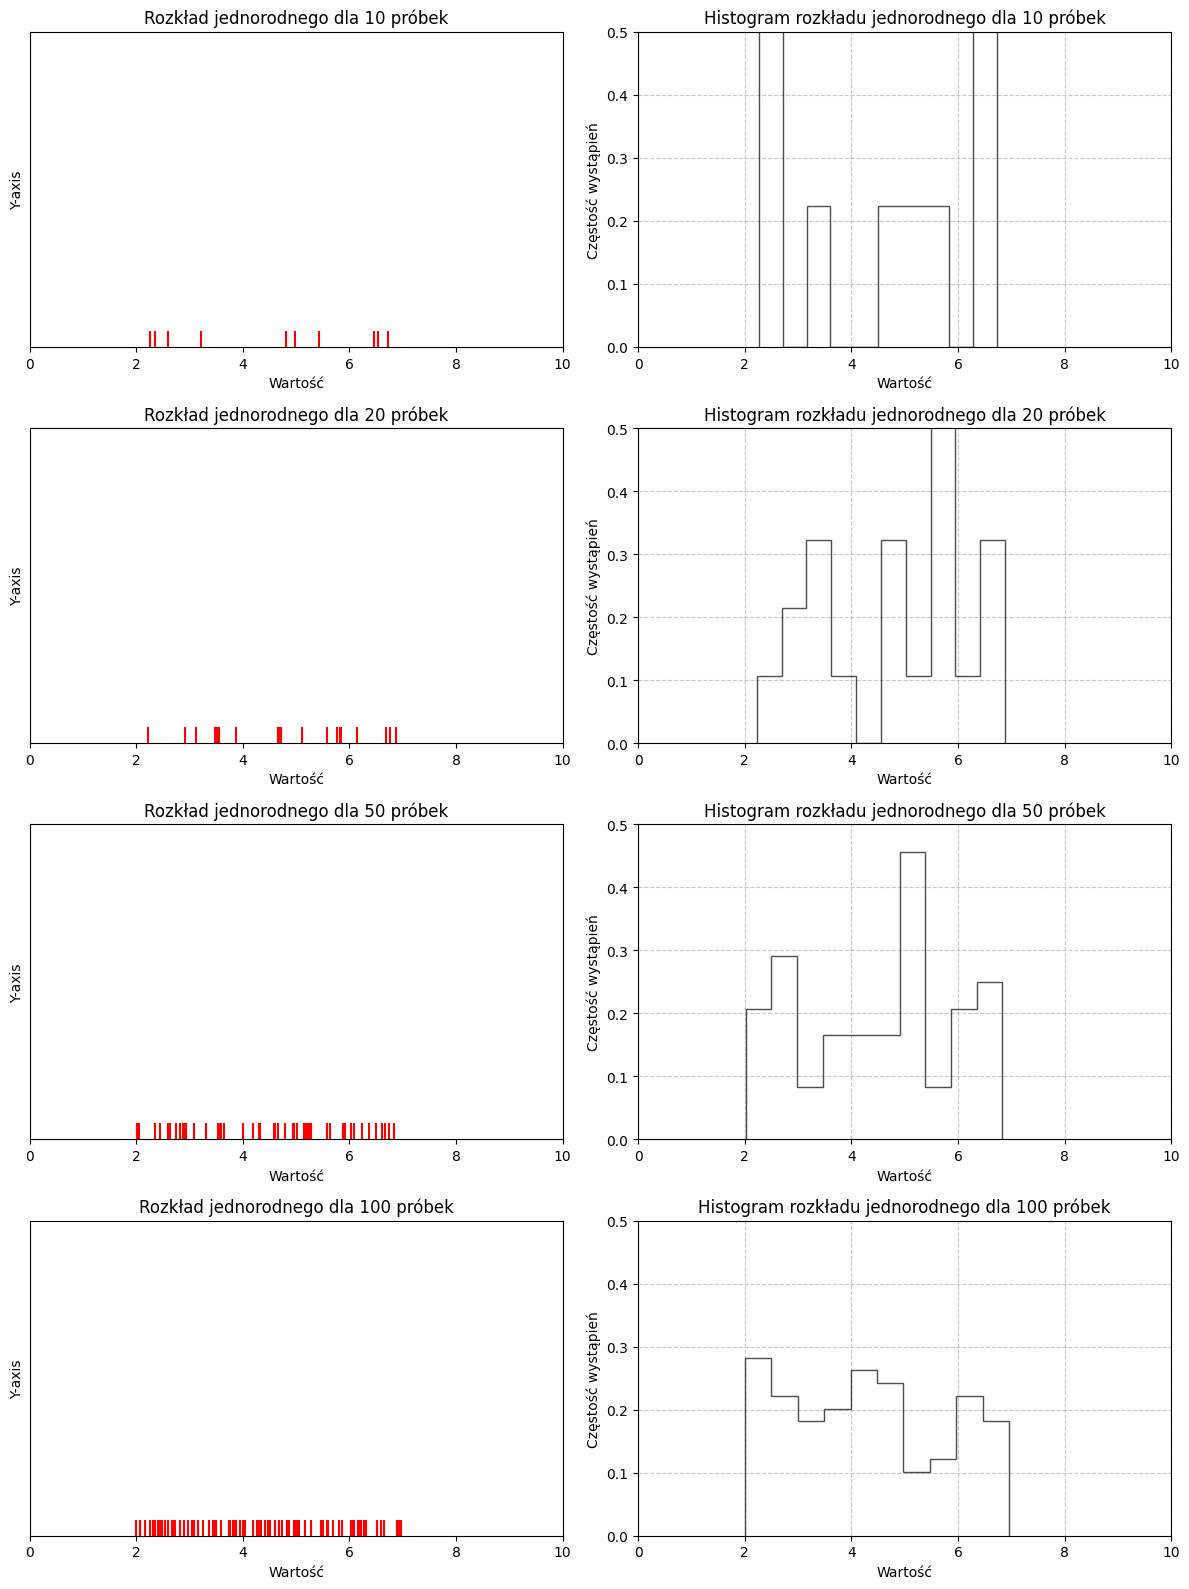

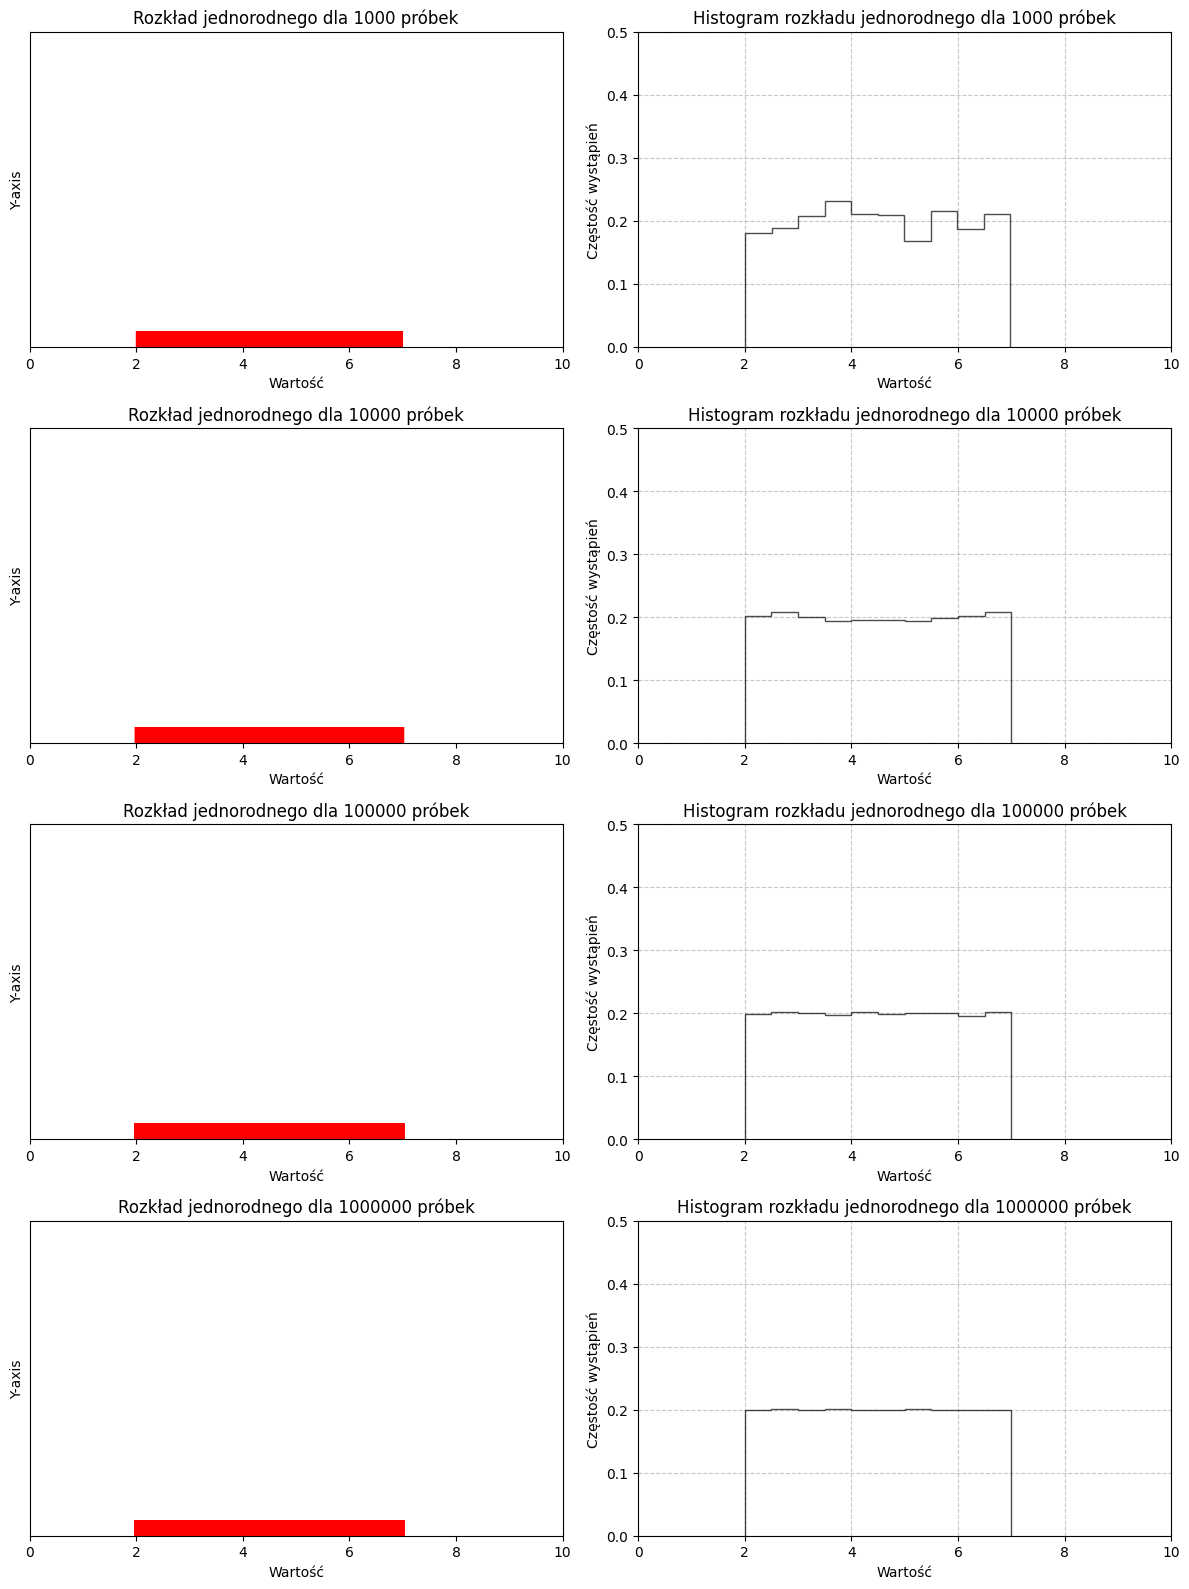

In [50]:
scatter_plus_histogram(sample_sizes)
scatter_plus_histogram(sample_sizes2)

### Wnioski

Wraz ze wzrostem ilości wygenerowanych próbek, równomierność rozkładu rośnie.\
W przypadku małych ilości próbek jak 10, 20 czy nawet 50, otrzymany rozkład jest bardzo nierównomierny i jest to widoczne gołym okiem.\
Dla 1 miliona próbek, górna linia histogramu jest praktycznie prosta, co oznacza, że wygenerowany rozkład jest bardzo równomierny, czego zresztą oczekiwano.\
Najbardziej zauważalna poprawa równomierności odniesiona została przy zmianie ilości na 1000 próbek, od tamtego momentu każdy kolejny rząd wielkości wartości przynosił coraz mniejsze zmiany, nie znaczy to jednak, że nie następowała poprawa względem poprzedniego.

## Eksperyment 2

Następnym eksperymentem było sprawdzenie jaki wpływ na wygląd histogramu miała liczba binów (przedziałów danych), na które został on podzielony.\
Rozkład wynikowy złożony był z 2 rozkłądów jednorodnych, `J(2, 7)` oraz `J(8, 9)`, były one równoliczne, każdy po 500 próbek.\
Na podstawie poprzednich ustaleń, ilość próbek została ustawiona na 1000, a badanie zostało przeprowadzone dla wartości 10, 20, 50, 100, 1000 oraz 2000 binów.

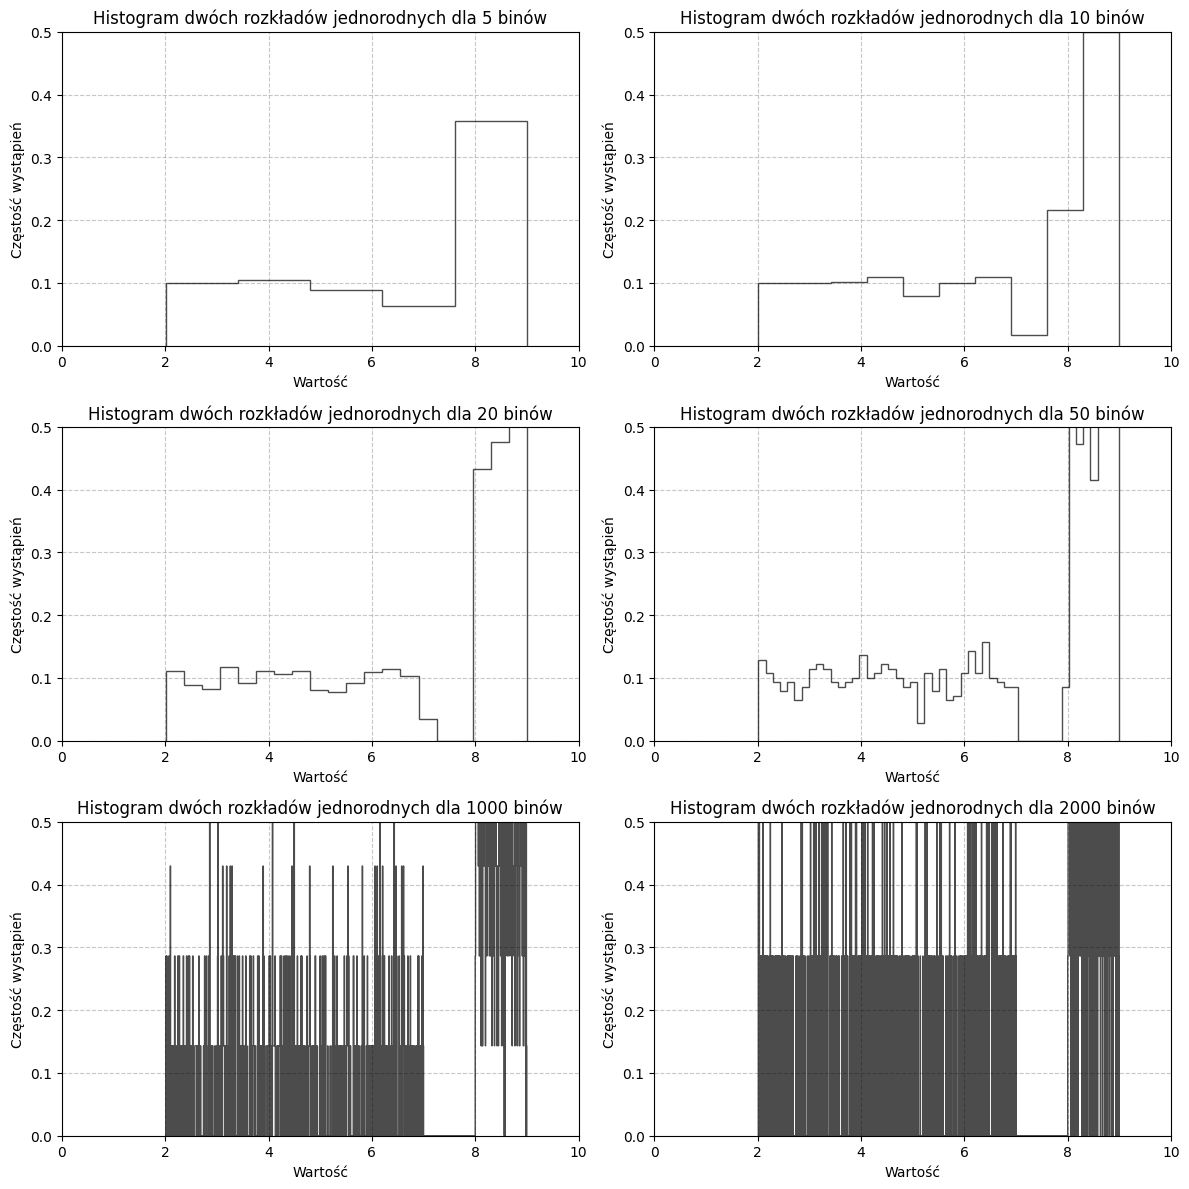

In [52]:
sample_size = 1000
bin_counts = [5, 10, 20, 50, 1000, 2000]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

uniform_sample = np.random.uniform(2, 7, sample_size)

sample_1 = np.random.uniform(2, 7, sample_size // 2)
sample_2 = np.random.uniform(8, 9, sample_size // 2)

combined_sample = np.concatenate([sample_1, sample_2])

for i, ax in enumerate(axes.flat):
    ax.hist(combined_sample, bins=bin_counts[i], edgecolor='black', alpha=0.7, histtype='step', fill=False, density=True)
    ax.set_title(f'Histogram dwóch rozkładów jednorodnych dla {bin_counts[i]} binów')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Częstość wystąpień')
    ax.set_ylim(0, 0.5)
    ax.set_xlim(0, 10)
    ax.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

## Wnioski

Można zauważyć, że przy niskich wartościach, histogram jest dość ogólny i niektóre szczegóły rozkładu zostają z tego powodu utracone (5, 10 binów, dla tych danych wejściowych).\
Najlepsze wyniki osiągnięte zostały dla wartości 20 oraz 50 binów, bardzo dobrze są wtedy ukazane rzeczywiste odwzorowanie danych z wyraźnie widocznymi słupkami histogramu.\
Przy zbyt dużej liczbie binów, cały histogram staje się nieczytelny, co unimożliwia wyciągnięcie z niego jakichkolwiek sensownych wniosków.

### Eksperyment 2.5

W ramach ciekawostki sporządzono również histogram o róznej ilości binów, dla każdego rozkładu, biorąc pod uwagę ich zakresy. Dzięki temu zabiegowi rozłożenie wystąpień w rozkładach jest bardzo dobrze widoczne.

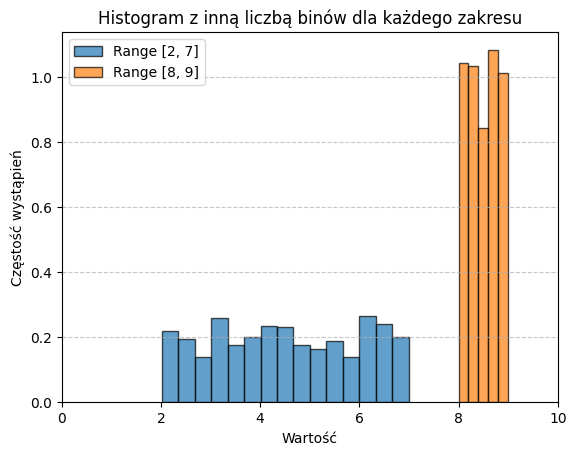

In [53]:
bins_range_1 = 15
bins_range_2 = 5

plt.hist(sample_1, bins=bins_range_1, edgecolor='black', alpha=0.7, label='Range [2, 7]', density=True)
plt.hist(sample_2, bins=bins_range_2, edgecolor='black', alpha=0.7, label='Range [8, 9]', density=True)

plt.title('Histogram z inną liczbą binów dla każdego zakresu')
plt.xlabel('Wartość')
plt.ylabel('Częstość wystąpień')
plt.legend()
plt.xlim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Eksperyment 3

Podobne badanie co w Eksperymencie 2, przeprowadzono również tutaj, lecz tym razem skorzystano z rozkładu normalnego o środku w punkcie 5 i odchyleniu standardowym równym 1. Ponownie badany był wpływ ilości binów na wygląd otrzymanego histogramu. Tym razem przetestowano wartości 10, 20, 50, 100, 1000 oraz 2000.

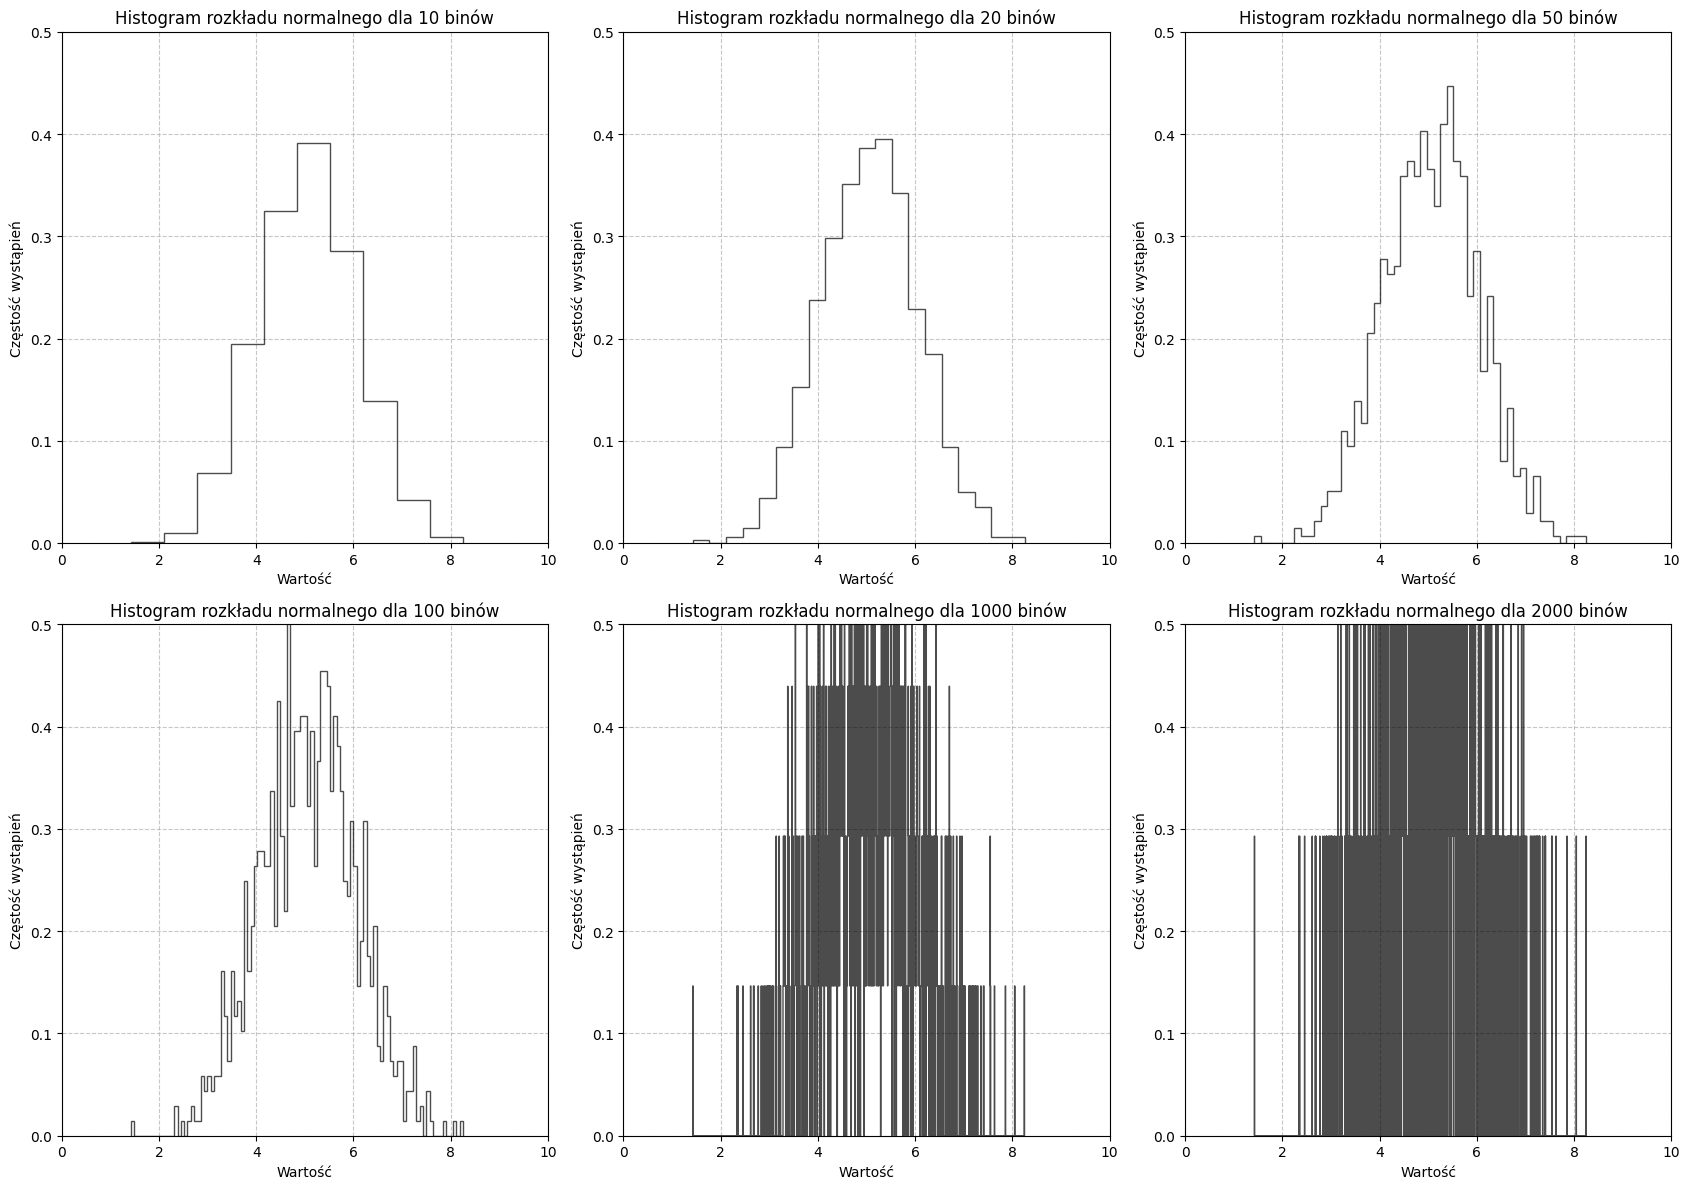

In [33]:
sample_size = 1000
bin_counts = [10, 20, 50, 100, 1000, 2000]

fig, axes = plt.subplots(2, 3, figsize=(17, 12))

normal_sample = np.random.normal(5, 1, sample_size)

for i, ax in enumerate(axes.flat):
    ax.hist(normal_sample, bins=bin_counts[i], edgecolor='black', alpha=0.7, histtype='step', fill=False, density=True)
    ax.set_title(f'Histogram rozkładu normalnego dla {bin_counts[i]} binów')
    ax.set_xlabel('Wartość')
    ax.set_ylabel('Częstość wystąpień')
    ax.set_ylim(0, 0.5)
    ax.set_xlim(0, 10)
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Wnioski

Podobnie jak w poprzednim tego typu eksperymencie, przy zbyt małej liczbie binów, wykres jest zbyt ogólny i rozkład wydaje się być bardziej modelowy niż jest w rzeczywistości. Przy zbyt dużej z kolei, staje się on nieczytalny i praktycznie bezużyteczny. Wynika stąd, że bardzo ważne jest odpowiednie dobranie ilości binów histogramu w zależności od liczby wygenerowanych danych oraz szerokości zakresu.

## Eksperyment 4

Polegał on na badaniu funkcji jądrowego estymatora gęstości, zarówno podstawowej jak i wzbogaconych o dodatkowe parametry wejściowe.

### 4.1
Jako pierwsza zbadana została funkcja gęstości jądra Gaussa dla jednej zmiennej losowej `K(x)`, któej wzór widoczny jest poniżej. Postć ta charakteryzuje się tym, że jądro jest symetryczne oraz maleje wykłądniczo wraz z oddalaniem się od środka `(x = 0)`. 

In [ ]:
def K(x):
    return 1. / math.sqrt(2 * math.pi) * math.exp(-x ** 2 / 2)

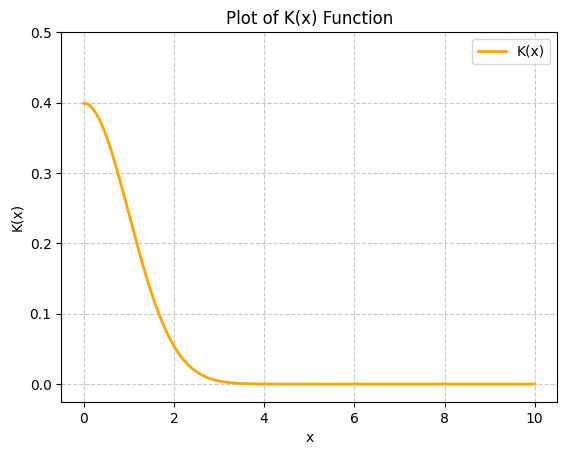

In [ ]:
x_values = np.linspace(0, 10, 500)
y_values = [K(x) for x in x_values]

plt.plot(x_values, y_values, label='K(x)', color='orange', linewidth=2)
plt.title('Plot of K(x) Function')
plt.xlabel('x')
plt.ylabel('K(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(- (10 * .05), 10.5)
plt.ylim(- (.5 * .05), 0.5)
plt.legend()
plt.show()

Powyżej zaprezentowano postać funkcji estymatora jądrowego dla zmiennej losowej `x` na zakresie `(0, 10)` oraz 500 punktów pośrednich. Łatwo zauważyć można, że funkcja rzeczywiście ma środek w punkcie `x = 0`, oraz fakt, że wykłądniczo maleje wraz ze wzrostem wartości zmiennej `x`.

### 4.2
Następnie wprowadzono do poprzedniej funkcji modyfikator położenia jądra (środka funkcji), czyli parametr `x0`.

In [36]:
def K2(x, x0):
    return 1. / math.sqrt(2 * math.pi) * math.exp(-(x - x0)** 2 / 2)

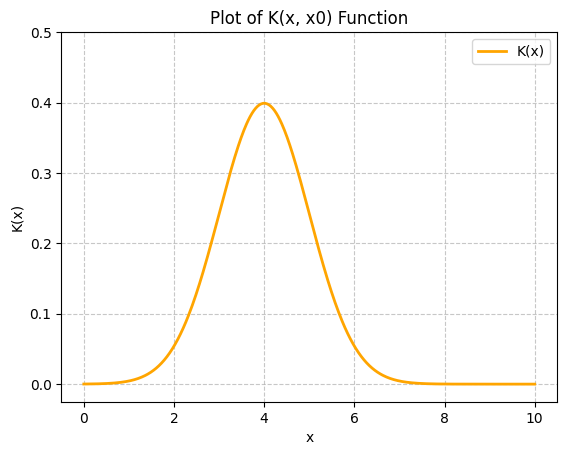

In [ ]:
x_values = np.linspace(0, 10, 500)
y_values = [K2(x, 4) for x in x_values]

plt.plot(x_values, y_values, label='K(x)', color='orange', linewidth=2)
plt.title('Plot of K(x, x0) Function')
plt.xlabel('x')
plt.ylabel('K(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(- (10 * .05), 10.5)
plt.ylim(- (.5 * .05), 0.5)
plt.legend()
plt.show()

Zgodnie z oczekiwaniami po ustawieniu wartości `x0 = 4`, środek funkcji przesunął się o 4 jednostki w prawo i znajduje się teraz w punkecie `x = 4`. Bardzo dobrze widać teraz jej symetryczność, a zdolność do przesunięcie jądra w dowolne miejsce, umożliwia stosowanie jej do estymacji gęstości danych z różnych lokalizacji.

### 4.3
Kolejnym parametrem, o który rozwinięto funkcję jest `m`, który jest parametrem umożliwiającym odpowiednie skalowanie wartości estymatora. Najczęściej jest on narzucony przez dane, które mają zostać poddane estymacji, w tym przypadku został on ustawiony na `1000`. Dodatkowo, pojedynczy punkt `x0` został zastąpiony wektorem elementów.

In [38]:
def f(x, x0, m=1000):
    return 1./m * 1./math.sqrt(2 * math.pi) * sum(math.exp(-(x - element) ** 2 / 2) for element in x0)

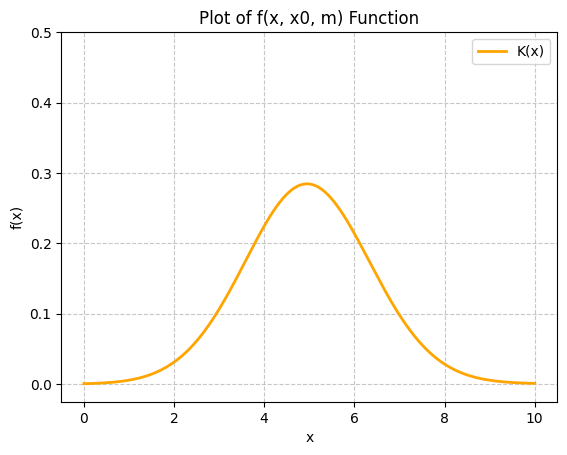

In [ ]:
x_values = np.linspace(0, 10, 1000)
x0 = np.random.normal(5, 1, 1000)
y_values = [f(x, x0) for x in x_values]

plt.plot(x_values, y_values, label='K(x)', color='orange', linewidth=2)
plt.title('Plot of f(x, x0, m) Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(- (10 * .05), 10.5)
plt.ylim(- (.5 * .05), 0.5)
plt.legend()
plt.show()

Na powyższym wykresie widać, że wprowadzenie parametru `m` sprawiło, że maksymalna wartość stała się mniejsza (poniżej `0.3` aktualnie w stosunku do `0.4` poprzednio), a także przesunął się środek wykresu, ponieważ podane `x0` było rozkładem normalnym `N(5, 1)`.

### 4.4

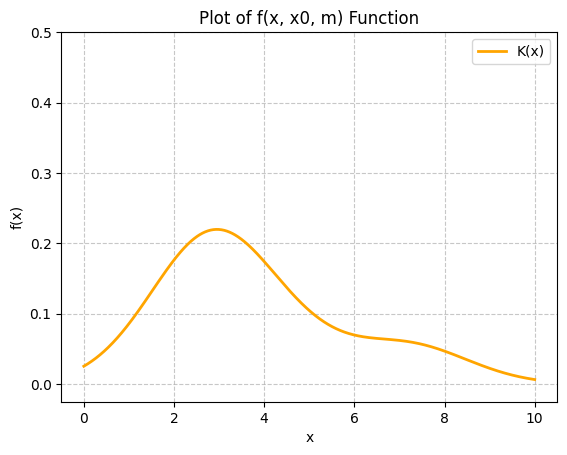

In [ ]:
sample_size = 1000
x0 = np.concatenate([np.random.normal(3, 1, int(0.8 * sample_size)), np.random.normal(7, 1, int(0.2 * sample_size))])

x_values = np.linspace(0, 10, sample_size)
y_values = [f(x, x0) for x in x_values]

plt.plot(x_values, y_values, label='K(x)', color='orange', linewidth=2)
plt.title('Plot of f(x, x0, m) Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(- (10 * .05), 10.5)
plt.ylim(- (.5 * .05), 0.5)
plt.legend()
plt.show()

Ponownie wykorzystana została funkcja `f(x, x0, m)`, jednak tym razem wykorzystany wektor 1000 elementów `x0` złożony był z 2 rozkładów normalnych - `N(3, 1)` o liczności 0.8 oraz `N(7, 1)` o liczności 0.2 liczby elementów wektora. Od razu widoczna jest różnica w wykresie, ponieważ tym razem można zauważyć "2 garby" w funkcji - jedno w punkcie `x = 3`, a drugie w `x = 7`, bezpośrednio odpowiadającym środkom zastosowanych rozkładów.

### 4.5
Ostatnią badaną funkcją był estymator jądrowy gęstości danych z dodatkiem parametru `h`, który reprezentuje szerokość jądra.

In [42]:
def fh(x, x0, h, m=1000):
    return 1./ (m * h) * 1./math.sqrt(2 * math.pi) * sum(math.exp(-((x - element) / h) ** 2 / 2) for element in x0)

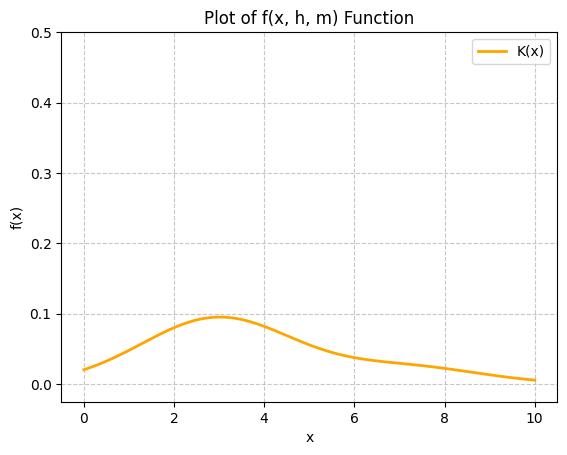

In [ ]:
sample_size = 500
x0 = np.concatenate([np.random.normal(3, 1, int(0.8 * sample_size)), np.random.normal(7, 1, int(0.2 * sample_size))])

x_values = np.linspace(0, 10, sample_size)
y_values = [fh(x, x0, 1.337) for x in x_values]

plt.plot(x_values, y_values, label='K(x)', color='orange', linewidth=2)
plt.title('Plot of f(x, h, m) Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(- (10 * .05), 10.5)
plt.ylim(- (.5 * .05), 0.5)
plt.legend()
plt.show()

Ponownie jako `x0` wykorzystano wektor złożony z 2 rozkładów Gaussa - `N(3, 1)` o liczności 0.8 oraz `N(7, 1)` o liczności 0.2. Dodatkowo, przez zastosowanie `h`, czyli parametru wygładzania, funkcja jest zauważalnie bardziej płaska w porównaniu z poprzednim punktem. Zbyt mała wartość parametru `h` powoduje pojawienie się znacznej ilości ekstremów lokalnych estymatora `f`, co jest sprzeczne z faktycznymi własnościami realnych populacji. Z drugiej strony, za duże wartości skutkują nadmiernym wygładzeniem tego estymatora, maskującym specyficzne cechy badanego rozkładu.

In [44]:
jak obliczyc h

jest na mailu w ksiazce i rownania - sigma

SyntaxError: invalid syntax (231676823.py, line 1)